   #                Coincent
  

# TASK1-IRIS_FLOWERS_CLASSIFICATION
# NAME:MB Hariharan

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the data

In [2]:
df =pd.read_csv(r"C:\Users\91760\Downloads\iris.data.csv")

### Defining columns

In [3]:
df.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### EDA

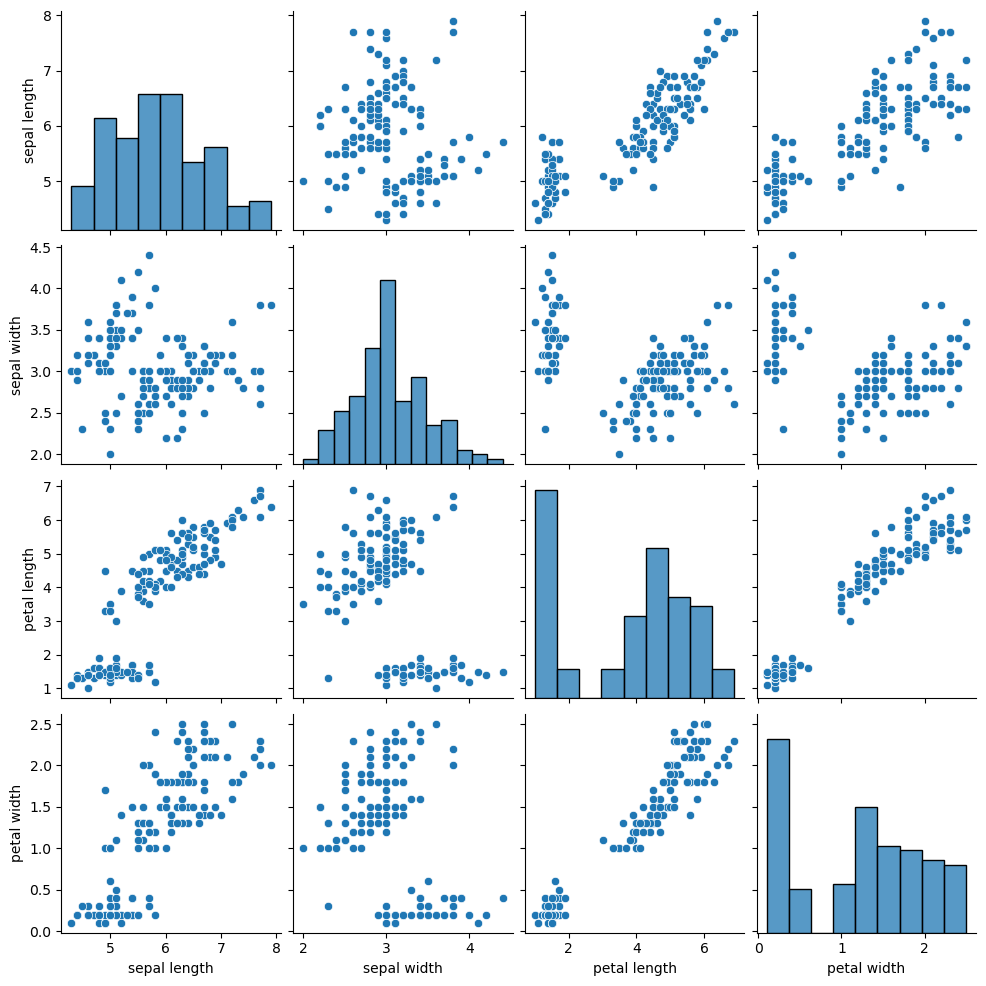

In [6]:
sns.pairplot(df)

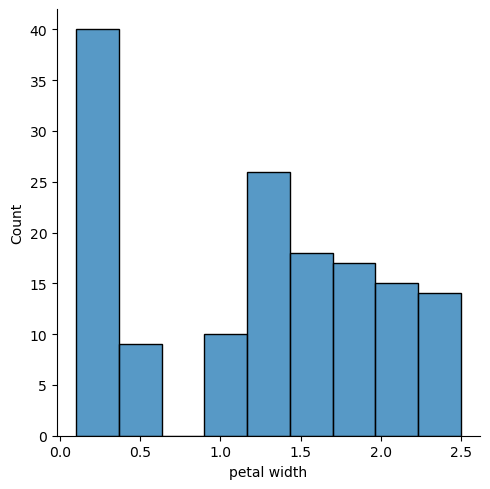

In [7]:
sns.displot(df['petal width'])

<AxesSubplot:>

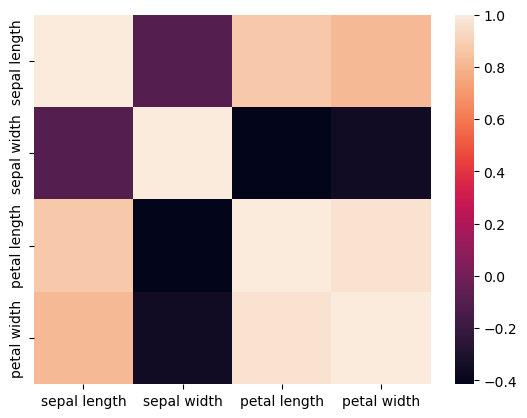

In [8]:
sns.heatmap(df.corr())

### Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

LE = LabelEncoder()
MMS = MinMaxScaler()

X = MMS.fit_transform(df.iloc[:, :-1])
y = LE.fit_transform(df.iloc[:, -1])

### Model Building

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
y_pred
     

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Comparing actual & predicted values

In [12]:
pd.DataFrame([[y_test[i], y_pred[i], True if y_test[i] == y_pred[i] else False] for i in range(len(X_test))], columns = ['Actual', 'Prediction', 'T/F'])

,Actual,Prediction,T/F
0,1,1,True
1,0,0,True
2,2,2,True
3,1,1,True
4,1,2,False
5,0,0,True
6,1,1,True
7,2,2,True
8,1,1,True
9,1,1,True


### Metrics

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred, average = 'weighted')
rs = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

print(f'Confusion Matrix: \n{cm}')
print(f'Accuracy Score: {acc}')
print(f'Precision Score: {ps}')
print(f'Recall Score: {rs}')
print(f'F1 Score: {f1}')

Confusion Matrix: 
[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
Accuracy Score: 0.9
Precision Score: 0.9214285714285714
Recall Score: 0.9
F1 Score: 0.896
